In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

773

In [6]:
# Import requests dependency to perform API requests and do a version check
import requests
requests.__version__
# Import API key for requests
from config import weather_key
# Build the base url
# url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&lat={lat}&lon={lon}&appid=" + weather_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_description = city_weather["weather"][0]["description"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date,
                         "Current Description": city_description})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 1 | garh maharaja
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 1 | qasigiannguit
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | lorengau
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | mareeba
Processing Record 12 of Set 1 | yar-sale
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | urengoy
Processing Record 15 of Set 1 | noumea
Processing Record 16 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 17 of Set 1 | grindavik
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | kuche
City not found. Skipping...
Processing Record 20 of Set 1 | farana

Processing Record 35 of Set 4 | kayes
Processing Record 36 of Set 4 | tombouctou
Processing Record 37 of Set 4 | beloha
Processing Record 38 of Set 4 | sembe
Processing Record 39 of Set 4 | lebu
Processing Record 40 of Set 4 | zeya
Processing Record 41 of Set 4 | souillac
Processing Record 42 of Set 4 | manggar
Processing Record 43 of Set 4 | tambacounda
Processing Record 44 of Set 4 | lesnyye polyany
Processing Record 45 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 46 of Set 4 | sibu
Processing Record 47 of Set 4 | oksfjord
Processing Record 48 of Set 4 | bournemouth
Processing Record 49 of Set 4 | roma
Processing Record 50 of Set 4 | jalu
Processing Record 1 of Set 5 | alyangula
Processing Record 2 of Set 5 | ust-kut
Processing Record 3 of Set 5 | nkowakowa
Processing Record 4 of Set 5 | bud
Processing Record 5 of Set 5 | codrington
Processing Record 6 of Set 5 | paamiut
Processing Record 7 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 8

Processing Record 25 of Set 8 | sola
Processing Record 26 of Set 8 | rabo de peixe
Processing Record 27 of Set 8 | opunake
Processing Record 28 of Set 8 | knysna
Processing Record 29 of Set 8 | ostersund
Processing Record 30 of Set 8 | aquiraz
Processing Record 31 of Set 8 | mnogovershinnyy
Processing Record 32 of Set 8 | englewood
Processing Record 33 of Set 8 | sur
Processing Record 34 of Set 8 | vylgort
City not found. Skipping...
Processing Record 35 of Set 8 | cheremukhovo
Processing Record 36 of Set 8 | mildura
Processing Record 37 of Set 8 | shanghai
Processing Record 38 of Set 8 | san rafael del sur
Processing Record 39 of Set 8 | japura
Processing Record 40 of Set 8 | whitianga
Processing Record 41 of Set 8 | rocha
Processing Record 42 of Set 8 | sabha
Processing Record 43 of Set 8 | hofn
Processing Record 44 of Set 8 | moranbah
Processing Record 45 of Set 8 | iskateley
Processing Record 46 of Set 8 | kodiak
Processing Record 47 of Set 8 | olafsvik
Processing Record 48 of Set 

Processing Record 11 of Set 12 | trat
Processing Record 12 of Set 12 | mangaluru
Processing Record 13 of Set 12 | arlit
Processing Record 14 of Set 12 | ola
Processing Record 15 of Set 12 | kendari
Processing Record 16 of Set 12 | fayaoue
Processing Record 17 of Set 12 | filadelfia
Processing Record 18 of Set 12 | manyana
Processing Record 19 of Set 12 | bairiki
Processing Record 20 of Set 12 | bone
Processing Record 21 of Set 12 | zyryanka
Processing Record 22 of Set 12 | ranong
Processing Record 23 of Set 12 | camocim
Processing Record 24 of Set 12 | alice springs
Processing Record 25 of Set 12 | riyadh
Processing Record 26 of Set 12 | porterville
Processing Record 27 of Set 12 | merauke
Processing Record 28 of Set 12 | garmsar
Processing Record 29 of Set 12 | ampanihy
Processing Record 30 of Set 12 | kautokeino
Processing Record 31 of Set 12 | hurghada
Processing Record 32 of Set 12 | daru
Processing Record 33 of Set 12 | chiredzi
Processing Record 34 of Set 12 | saint-francois
Proc

Processing Record 1 of Set 16 | maniitsoq
Processing Record 2 of Set 16 | chara
Processing Record 3 of Set 16 | vestmannaeyjar
Processing Record 4 of Set 16 | fomboni
Processing Record 5 of Set 16 | panguna
Processing Record 6 of Set 16 | karratha
Processing Record 7 of Set 16 | blagoyevo
Processing Record 8 of Set 16 | wenling
Processing Record 9 of Set 16 | arroyo
Processing Record 10 of Set 16 | halalo
City not found. Skipping...
Processing Record 11 of Set 16 | hobbs
Processing Record 12 of Set 16 | puerto madryn
Processing Record 13 of Set 16 | chicama
Processing Record 14 of Set 16 | oriximina
Processing Record 15 of Set 16 | sao sebastiao
Processing Record 16 of Set 16 | milazzo
Processing Record 17 of Set 16 | rio gallegos
Processing Record 18 of Set 16 | adeje
Processing Record 19 of Set 16 | uk
City not found. Skipping...
Processing Record 20 of Set 16 | george
Processing Record 21 of Set 16 | floro
Processing Record 22 of Set 16 | inongo
Processing Record 23 of Set 16 | raud

In [8]:
len(city_data)

712

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

In [10]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness',
                    'Wind Speed','Current Description']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,Garh Maharaja,PK,2022-07-25 14:27:31,30.8339,71.9053,91.44,60,83,9.37,moderate rain
1,Vaini,TO,2022-07-25 14:27:31,-21.2000,-175.2000,71.76,88,40,6.91,scattered clouds
2,Hilo,US,2022-07-25 14:26:04,19.7297,-155.0900,77.29,94,100,8.01,overcast clouds
3,Qasigiannguit,GL,2022-07-25 14:27:32,68.8193,-51.1922,43.05,88,97,4.14,overcast clouds
4,Longyearbyen,SJ,2022-07-25 14:27:32,78.2186,15.6401,49.84,76,40,12.66,scattered clouds
5,Georgetown,MY,2022-07-25 14:26:21,5.4112,100.3354,81.90,91,40,3.44,scattered clouds
6,Lorengau,PG,2022-07-25 14:27:32,-2.0226,147.2712,80.98,81,31,5.57,scattered clouds
7,Tasiilaq,GL,2022-07-25 14:27:33,65.6145,-37.6368,48.36,82,100,1.43,overcast clouds
8,Mareeba,AU,2022-07-25 14:27:33,-17.0000,145.4333,65.12,88,0,2.77,clear sky
9,Yar-Sale,RU,2022-07-25 14:27:34,66.8333,70.8333,57.88,57,63,15.32,broken clouds


In [11]:
# Create the output file (CSV).
output_data_file = "WeatherPy_Database.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

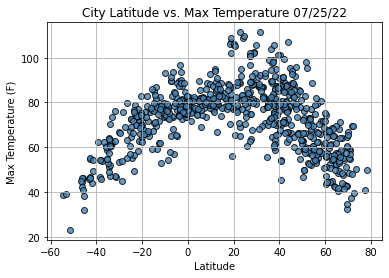

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities", c="steelblue", facecolor="white")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

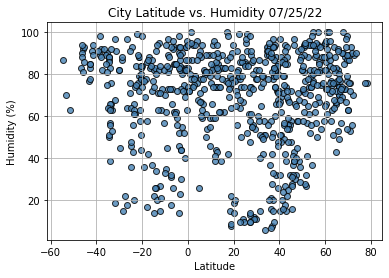

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities", c="steelblue", facecolor="white")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
# plt.savefig("Fig2.png")
# Show plot.
plt.show()

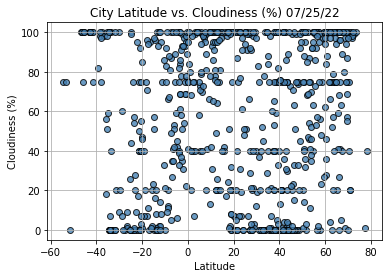

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities", c="steelblue", facecolor="white")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
# plt.savefig("Fig3.png")
# Show plot.
plt.show()

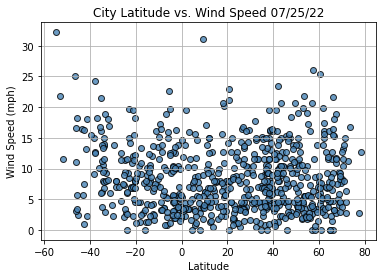

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities", c="steelblue", facecolor="white")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
# plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values, edgecolor="black",
            linewidths=1, c="darkcyan", facecolor="white")
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value for this plot is {round(r_value,3)}.")

In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

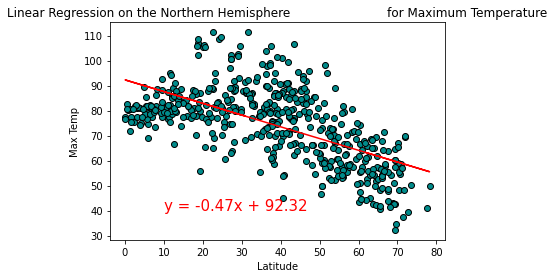

The r-value for this plot is -0.616.


<Figure size 432x288 with 0 Axes>

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))
plt.savefig("Fig2.png")

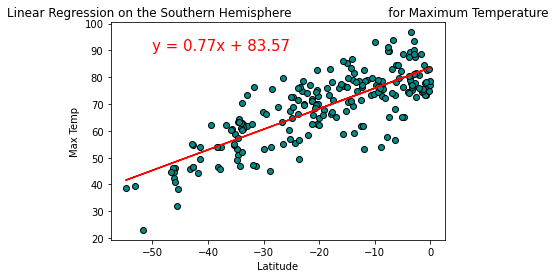

The r-value for this plot is 0.796.


<Figure size 432x288 with 0 Axes>

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))
plt.savefig("Fig3.png")

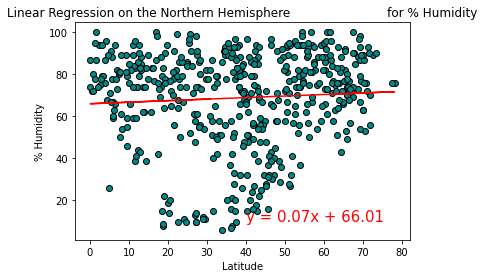

The r-value for this plot is 0.063.


In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

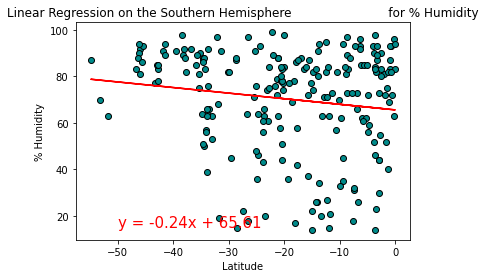

The r-value for this plot is -0.148.


In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

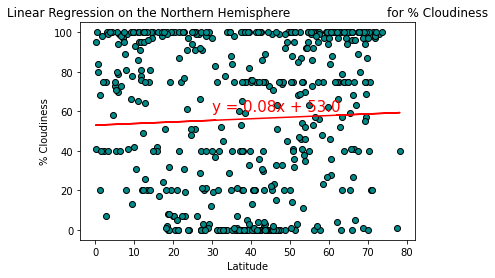

The r-value for this plot is 0.041.


In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(30,60))

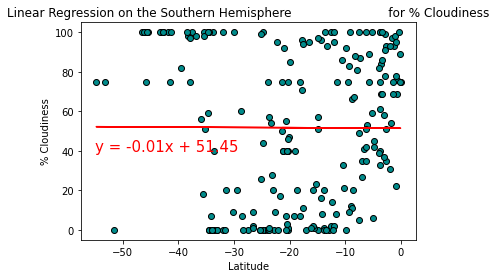

The r-value for this plot is -0.005.


In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,40))

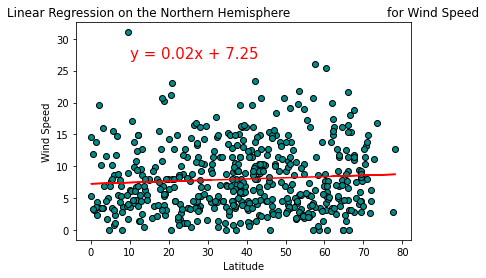

The r-value for this plot is 0.071.


In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,27))

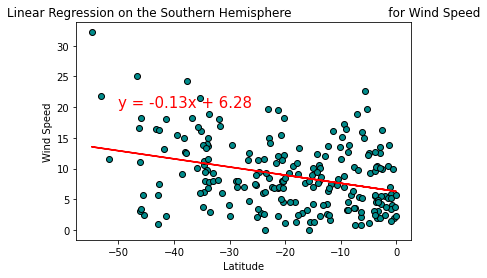

The r-value for this plot is -0.327.


In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))